In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Physical constants
sigma = 5.670367e-8  # Stefan-Boltzmann constant [W / (m^2 K^4)]

S = 340  # Solar constant [W/m^2]
p_s = 1e5  # Surface pressure [Pa]

tau_S = 0.3  # Total shortwave optical thickness [kg/m^2]

In [11]:
def T(beta, tau):
    return np.power(S / (2*sigma), 0.25) * np.power(1 + (1/beta) + np.exp(-beta*tau) * (beta - (1/beta)), 0.25)

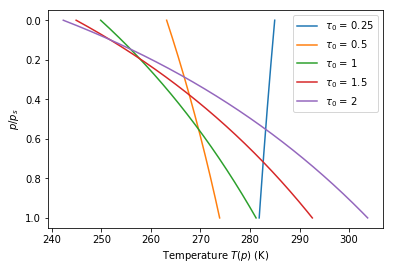

In [14]:
# Problem 3(c)
tau_0_values = [0.25, 0.5, 1, 1.5, 2]
p_values = np.linspace(0, p_s, 1000)

for tau_0 in tau_0_values:
    beta = tau_S / tau_0
    tau_values = tau_0 * (p_values/p_s)
    T_values = list(map(lambda tau: T(beta, tau), tau_values))
    plt.plot(T_values, p_values/p_s, label=r'$\tau_0$ = {:}'.format(tau_0))
    
plt.xlabel(r'Temperature $T(p)$ (K)')
plt.ylabel(r'$p/p_s$')
plt.gca().invert_yaxis()
plt.legend()
plt.show()

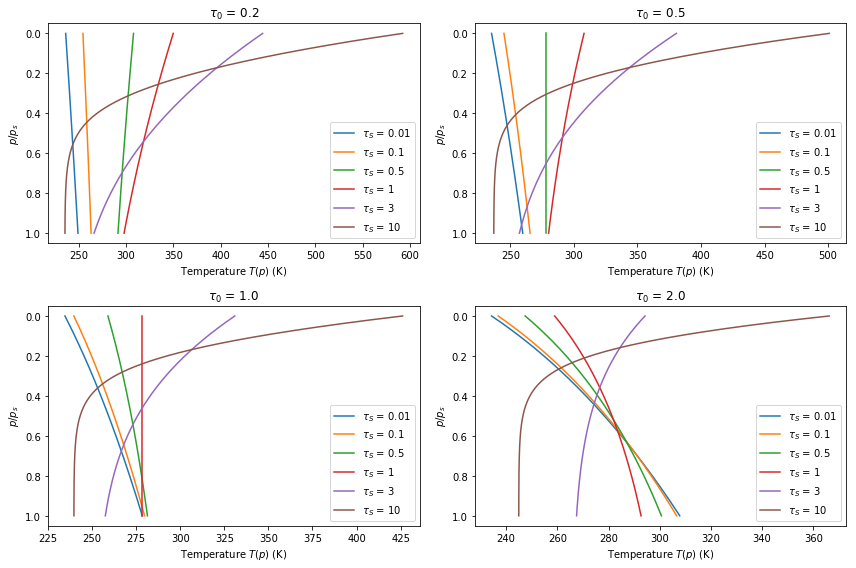

In [21]:
# Problem 3(d)
tau_0_values = [0.25, 0.5, 1, 2]
tau_S_values = [0.01, 0.1, 0.5, 1, 3, 10]
p_values = np.linspace(0, p_s, 1000)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
for i, ax in enumerate(fig.axes):
    tau_0 = tau_0_values[i]
    
    for tau_S in tau_S_values:
        beta = tau_S / tau_0
        tau_values = tau_0 * (p_values/p_s)
        T_values = list(map(lambda tau: T(beta, tau), tau_values))
        ax.plot(T_values, p_values/p_s, label=r'$\tau_S$ = {:}'.format(tau_S))
    
    ax.set_title(r'$\tau_0$ = {:.1f}'.format(tau_0))
    ax.set_xlabel(r'Temperature $T(p)$ (K)')
    ax.set_ylabel(r'$p/p_s$')
    ax.invert_yaxis()
    ax.legend()

plt.tight_layout()
plt.show()